In [1]:
#Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
%matplotlib inline
import os
os.chdir (r"D:/anaconda/ashok/Project/AppliedStats/Final")

In [2]:
# Reading the data as a data frame
df = pd.read_csv('insurance.csv')
print (df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
# Information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Finding Shape of data
# Inference : There are 1338 rows and 7 columns of data
df.shape

(1338, 7)

In [5]:
# Finding Type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# Checking presence of missing values
# Inference : There are no missing values
df.isnull()


,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [7]:
# Checking presence of missing values
# Inference : No null values in the dataset
df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [8]:
# EDA - Viewing first 5 rows of data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# Five point summary of numerical attributes - Age, bmi, children, charges
"""
1. age column : data looks representative of the true age distribution of the adult population
2. Very few people have more than 2 children. 75% of the people have 2 or less children
3. The claimed amount is higly skewed as most people would require basic medicare and only few suffer from diseases which cost more to get rid of
"""
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


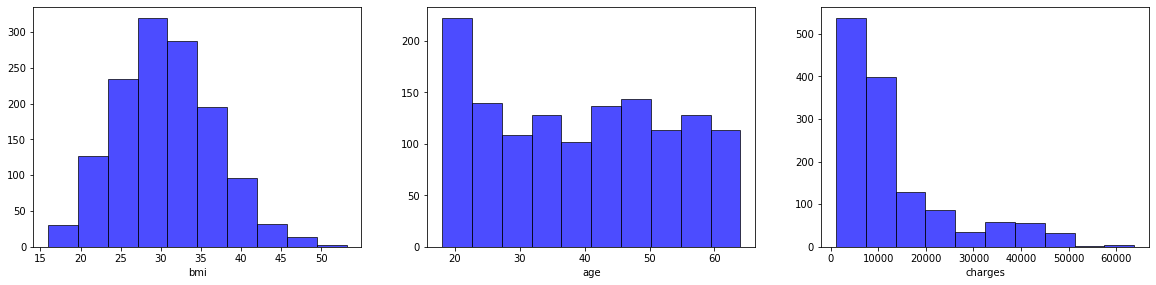

In [10]:
#EDA - Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
"""
Inference:
1. bmi looks quiet normally distributed
2. age is distributed quiet uniformly
3. charges are highly skewed
"""
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()


In [11]:
# EDA - Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
"""
Inference:
1. Skew of bmi is very less
2. Not much of skew in age
3. charges are highly skewed
"""
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


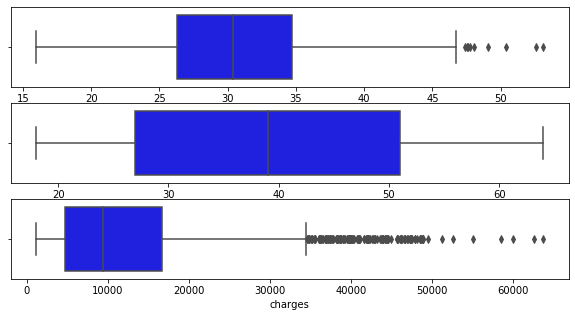

In [12]:
# EDA - Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
"""
Inference:
1. bmi has a few extreme values
2. charges : there are lot of extreme values
"""
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='blue')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='blue')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='blue')

plt.show()

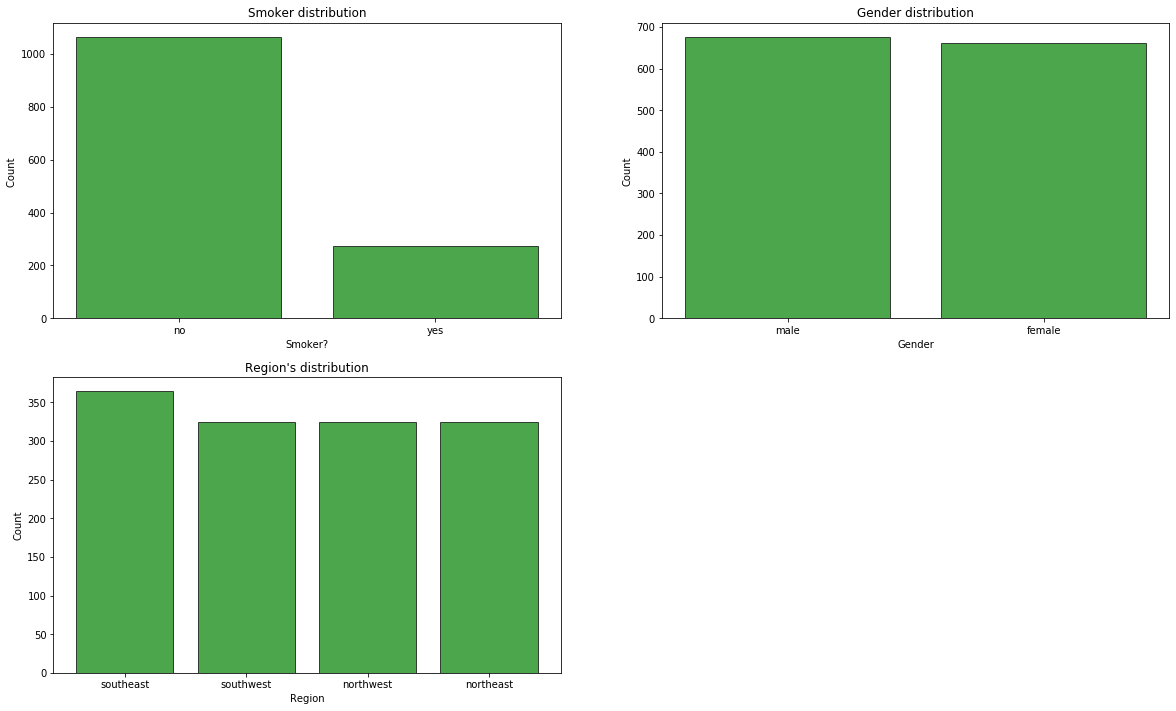

In [13]:
#EDA - Distribution of categorical columns - sex, smoker, region

"""
Inference:
1.There are a lot more non-smokers than there are smokers in the data
2.Instances are distributed evenly accross all regions
3.Gender is also distributed evenly
"""

plt.figure(figsize=(20,25))

x = df.smoker.value_counts().index  
y = [df['smoker'].value_counts()[i] for i in x]  

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'green',edgecolor = 'black',alpha = 0.7)
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = df.sex.value_counts().index    
y1 = [df['sex'].value_counts()[j] for j in x1]  

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'green',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df.region.value_counts().index   
y2 = [df['region'].value_counts()[k] for k in x2]

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'green',edgecolor = 'black',alpha = 0.7) 
plt.xlabel('Region')
plt.ylabel('Count')
plt.title("Region's distribution")

plt.show()


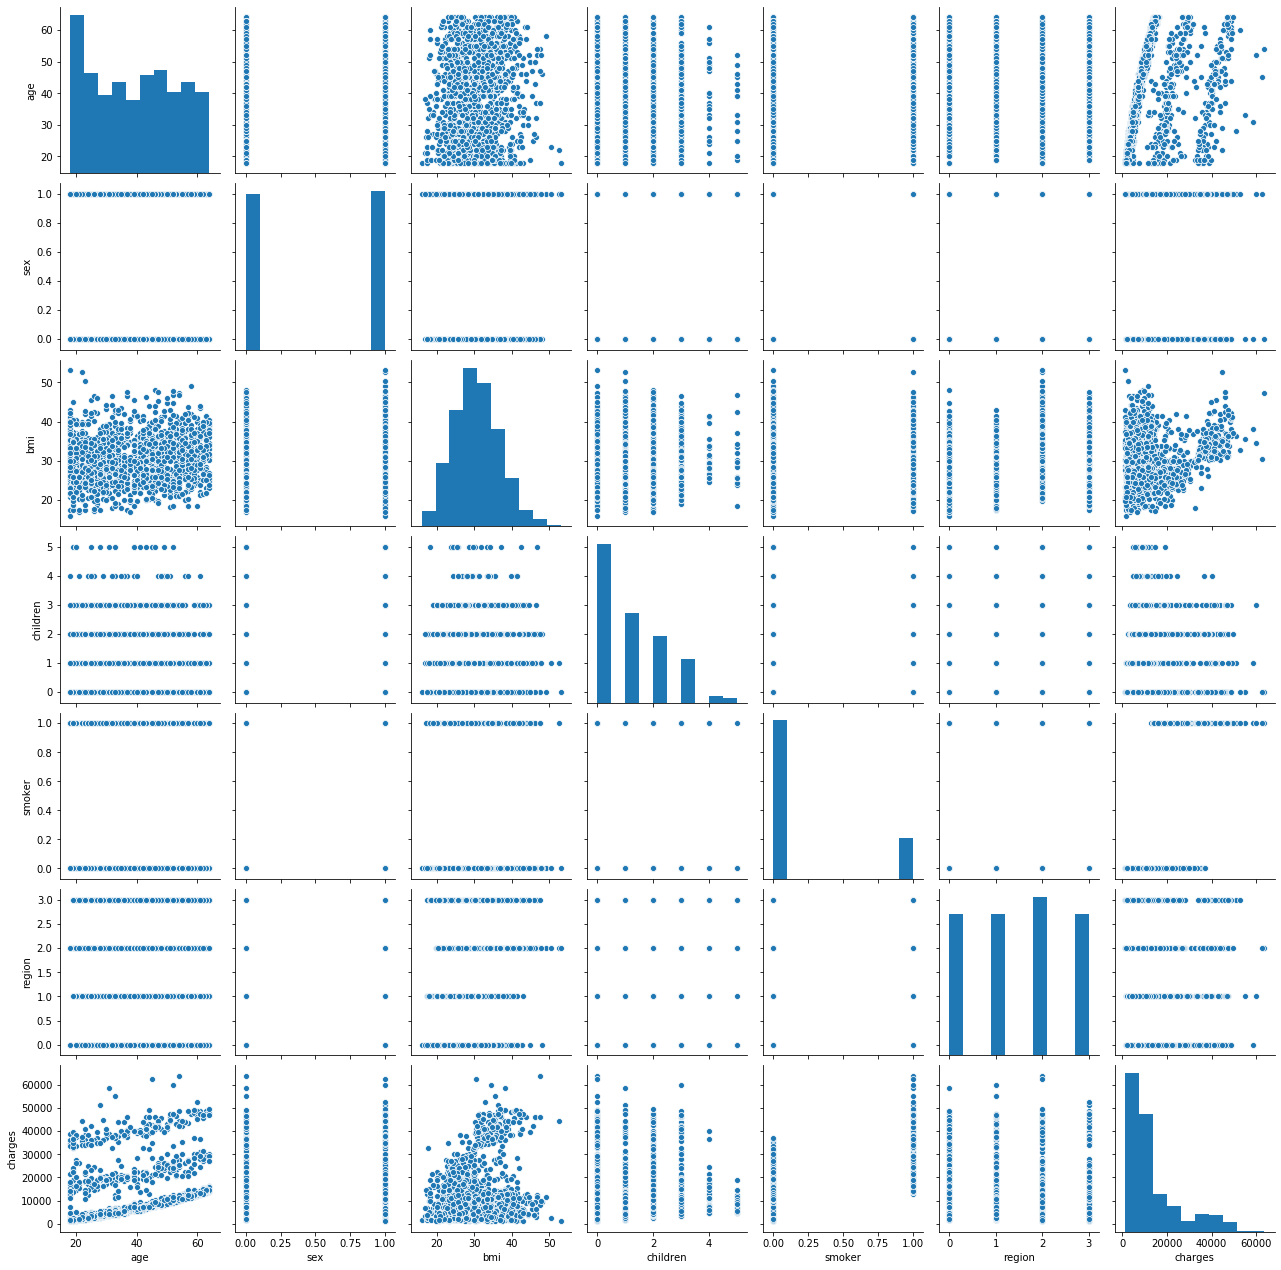

In [14]:
# EDA - Pair plot that includes all the columns of the data frame
"""
Inference:
1. The only obvious correlation of 'charges' is with 'smoker'
2. smokers claimed more money than non-smokers
3. For the same ailment, older people are charged more than the younger ones
"""
from sklearn.preprocessing import LabelEncoder
import copy

df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  #pairplot
plt.show()

In [15]:
# Question : Do charges of people who smoke differ significantly from the people who don't?
# Step-1 : Identifying number of smokers from the dataset which is 274
df.smoker.value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

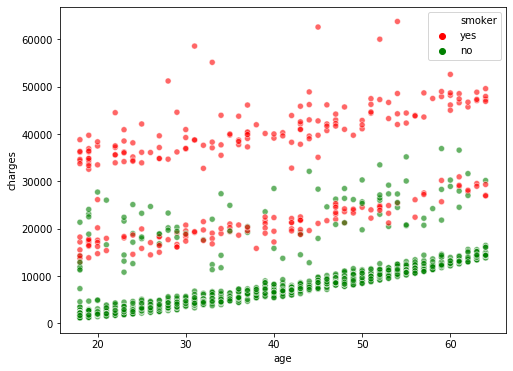

In [16]:
# Question : Do charges of people who smoke differ significantly from the people who don't?
# Step-2 : Scatter plot to show visual evidence of dependency between attributes "smoker" and "charges" across different ages
"""
Inference:
From Scatter plot, the difference between charges of smokers and charges of non-smokers is clearly visible
"""
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red', 'green'] ,alpha=0.6)
plt.show()

In [17]:
# Question : Do charges of people who smoke differ significantly from the people who don't?
# Step-3 : T-test is done to check dependency of smoking on charges
"""
Result of T-test:
Smokers claim significantly more money than non-smokers
"""

Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


In [18]:
# Question : Does bmi of males differ significantly from that of females ?
# Step-1 : Checking distribution of males and females
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

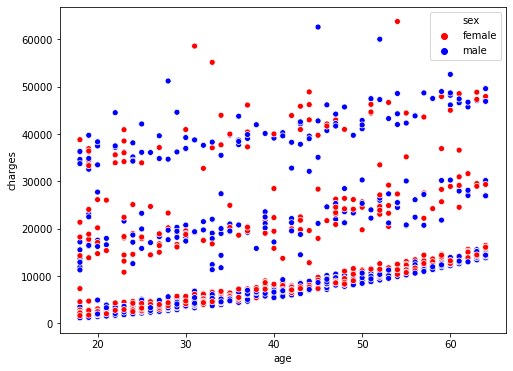

In [19]:
# Question : Does bmi of males differ significantly from that of females ?
# Step-2 : Scatter plot to show visual evidence of dependency between gender and charges
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['red','blue'] )
plt.show()

In [20]:
# Question : Does bmi of males differ significantly from that of females ?
# Step-3 :T-test is done to check dependency of bmi on gender
"""
Result of T-test:
1. Gender has no effect on bmi as the p_value (0.09) > 0.05
2. bmi for both genders are identical
"""
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(2)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


In [21]:
# Question : Is the proportion of smokers significantly different in different genders ?
# Chi_square test is performed to check whether smoking habits are different for different genders
"""
Result of Chi_square test: Gender has an effect on smoking habits as the p_value (0.007) < 0.05
Yes, the proportion of smokers significantly different in different genders
"""

Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [22]:
# Question : Is the distribution of bmi across women with no children, one child and two children, the same
# Oneway ANOVA is performed to check if the distributions of bmi values for females having different number of children are significantly different
"""
Result of oneway ANOVA test : BMI is not changed by the number of children a women has
"""

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


No. of children has no effect on bmi as the p_value (0.716) > 0.05
